### Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.graph_objs import Scatter

import seaborn as sns
import squarify

import math
import numpy as np
from scipy import stats as st
import numpy as np

pd.options.display.max_columns = None

df_games = pd.read_csv('games.csv')



#### change all columns names to lowercase

In [2]:
df_games.columns = df_games.columns.str.lower()
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
df_games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [4]:
df_games.describe(include = ['object'])

name platform   genre user_score rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df_games.shape

(16715, 11)

In [7]:
#how many NULL are ther in df_games
df_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Step 2. Prepare the data

#### name:

In [8]:
df_games[df_games['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

#### Since year of release is 1993, it is expected to have plenty of missing data.
#### Regarding the missing names, they are irrelevant being so old. Will just fill in "missing name'
#### same for Genre

In [9]:
df_games['name'] = df_games['name'].fillna('missing name')

In [10]:
df_games['genre'] = df_games['genre'].fillna('missing genre')

#### year_of_release:

In [11]:
df_games[df_games['year_of_release'].isna()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

#### For games with missing year of release, if the year appear in the name, use it.

In [12]:
def year_of_release(row):
    name = row['name']
    for year in range(1980, 2017):
        if str(year) in name:
            return year
    return None

df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games.apply(year_of_release, axis = 1))

#### find the year platformed first appered 

In [13]:
platform_year_of_release_df = df_games.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'min').reset_index()
platform_year_of_release_df.head()

platform  year_of_release
0     2600           1980.0
1      3DO           1994.0
2      3DS           2011.0
3       DC           1998.0
4       DS           1985.0

#### For games with missing year of release, the first year of the platform will be release year

In [14]:
def platform_release(row):
    platform = row['platform']
    year_df = platform_year_of_release_df[platform_year_of_release_df['platform'] == platform]
    year = year_df['year_of_release'].values.tolist()
    return year[0]
    

df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games.apply(platform_release, axis = 1))

#### change year_of_release to int

In [15]:
df_games.year_of_release = df_games.year_of_release.astype(int)

#### critic_score:

#### find mean by genre and year.
#### since minimum value is 13 , will replace all NULL with 0,later 0 will be replaced with calculatd value.

In [16]:
df_games['critic_score'].fillna(0, inplace=True)

In [17]:
genre_year_of_release_critic_score_df = df_games[df_games['critic_score'] != 0].pivot_table(index = ('genre', 'year_of_release'), values = 'critic_score', aggfunc = 'mean' ).reset_index()
genre_year_of_release_critic_score_df['critic_score_mean'] = genre_year_of_release_critic_score_df['critic_score']
del genre_year_of_release_critic_score_df['critic_score']
genre_year_of_release_critic_score_df.head()

genre  year_of_release  critic_score_mean
0  Action             1985          64.285714
1  Action             1994          71.000000
2  Action             1996          89.333333
3  Action             1997          86.000000
4  Action             1998          84.333333

In [18]:
def critic_score_update(row):
    critic_score = row['critic_score']
    genre = row['genre']
    year_of_release = row['year_of_release']        
    
    if critic_score == 0:
        critic_score_df = genre_year_of_release_critic_score_df[(genre_year_of_release_critic_score_df['genre'] == genre) & (genre_year_of_release_critic_score_df['year_of_release'] == year_of_release)]['critic_score_mean']
        if critic_score_df.empty:
            return 0
        critic_score_mean = critic_score_df.values.tolist()
        return critic_score_mean[0]       
    return critic_score

df_games['critic_score'] = df_games.apply(critic_score_update, axis = 1)



#### user_score:

#### find mean by genre and year.
#### since max value is 10 , will replace all NULL with 100,later 100 will be replaced with calculatd value.

In [19]:
df_games['user_score'].fillna(100, inplace=True)

### Pay attention to the abbreviation TBD
#### TBD values will be considered as missing values and will also get 100

In [20]:
def user_score_update(row):
    user_score = row['user_score']
    if user_score == 'tbd':
        return 100
    return user_score    

df_games['user_score'] = df_games.apply(user_score_update, axis = 1)

#### change user_score to float

In [21]:
df_games.user_score = df_games.user_score.astype(float)

In [22]:
genre_year_of_release_user_score_df = df_games[df_games['user_score'] != 100].pivot_table(index = ('genre', 'year_of_release'), values = 'user_score', aggfunc = 'mean' ).reset_index()
genre_year_of_release_user_score_df['user_score_mean'] = genre_year_of_release_user_score_df['user_score']
del genre_year_of_release_user_score_df['user_score']
genre_year_of_release_user_score_df.head()

genre  year_of_release  user_score_mean
0  Action             1985             6.62
1  Action             1994             8.30
2  Action             1996             8.70
3  Action             1997             8.55
4  Action             1998             8.68

In [23]:
def user_score_update(row):
    user_score = row['user_score']
    genre = row['genre']
    year_of_release = row['year_of_release']        
    
    if user_score == 100:
        user_score_df = genre_year_of_release_user_score_df[(genre_year_of_release_user_score_df['genre'] == genre) & (genre_year_of_release_user_score_df['year_of_release'] == year_of_release)]['user_score_mean']
        if user_score_df.empty:
            return 0
        user_score_mean = user_score_df.values.tolist()
        return user_score_mean[0]       
    return user_score

df_games['user_score'] = df_games.apply(user_score_update, axis = 1)

#### rating:

#### rating by year and genre

In [24]:
df_games.pivot_table(index = ('year_of_release', 'genre'), columns = 'rating', values = 'name', aggfunc = 'count' ).reset_index().head()

rating  year_of_release      genre  AO    E  E10+  EC  K-A    M  RP    T
0                  1985     Action NaN  3.0   2.0 NaN  NaN  2.0 NaN  1.0
1                  1985  Adventure NaN  1.0   NaN NaN  NaN  NaN NaN  1.0
2                  1985   Fighting NaN  NaN   NaN NaN  NaN  NaN NaN  1.0
3                  1985       Misc NaN  1.0   NaN NaN  NaN  NaN NaN  2.0
4                  1985   Platform NaN  NaN   2.0 NaN  NaN  NaN NaN  NaN

#### Since I can not completet the missing values at the rating.
#### will place MIS - for missing. as rating where there is a NULL value.

In [25]:
df_games['rating'].fillna('mis', inplace=True)
df_games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16715.000000  16715.000000  16715.000000  16715.000000   
mean       2006.361173      0.263377      0.145060      0.077617   
std           6.018701      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score    user_score  
count  16715.000000  16715.000000  16715.000000  
mean       0.047342     65.610191      6.755585  
std        0.186731     19.238769      2.017786  
min        0.000000      0.000000      0.000000  
25%        0.000000     63.052632      6.589474  
50%        0.010000     69.000000      7.127174  
75%        0.030000     75.153846      7.827273  
max       10.570000     98.000000      9.700000

In [26]:
df_games.describe(include = ['object'])

name platform   genre rating
count                         16715    16715   16715  16715
unique                        11560       31      13      9
top     Need for Speed: Most Wanted      PS2  Action    mis
freq                             12     2161    3369   6766

#### how many NULL are there in df_games

In [27]:
df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### there are no more null values in the data

### Why do you think the values are missing? Give possible reasons.

### Much of the data is old, probably some of the information could have been lost.
### Maybe some of it was never created.
### Could be that for unpopular games no user ratings of critic score were given.
### Or maybe small sales were never mentioned.

### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [28]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
df_games[['name', 'total_sales']].head()

name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38

### Step 3. Analyze the data

### Look at how many games were released in different years. Is the data for every period significant?

#### create a df with amount of games & Year_of_Release


In [30]:
amount_year_of_release_df = df_games[['year_of_release','name',]].groupby('year_of_release').count().sort_values(by = 'year_of_release').reset_index()

In [31]:
amount_year_of_release_df.head()

year_of_release  name
0             1980    26
1             1981    46
2             1982    36
3             1983    17
4             1984    14

#### create lollypop graphs

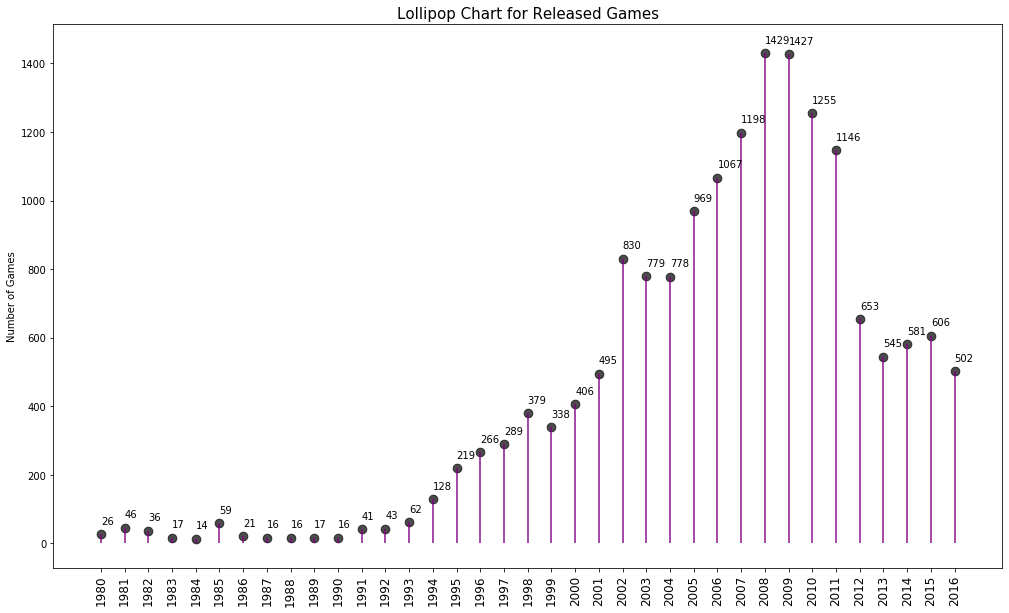

In [32]:
fig, ax = plt.subplots(figsize = (17, 10))
ax.vlines(x = amount_year_of_release_df.year_of_release, ymin = 0, ymax = amount_year_of_release_df.name, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = amount_year_of_release_df.year_of_release, y = amount_year_of_release_df.name, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Lollipop Chart for Released Games', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('Number of Games')
#set ticks
ax.set_xticks(amount_year_of_release_df.year_of_release)
ax.set_xticklabels(amount_year_of_release_df.year_of_release, rotation = 90, fontdict = {'horizontalalignment' : 'center', 'size': 12})

#add text above the dot
for row in amount_year_of_release_df.itertuples():
    ax.text(row.year_of_release, row.name + 30, s = round(row.name, 2))
 

#### The data before 1994 is insignificant. There were very few games published.
#### The gaming world has change dramatically from year to year. I doubt any information older than 10 years is relevant.
#### Because there was a boom in games releases in 2002 I think that only data from 2012 will be relevant to a 2017 camping. 

### Look at how sales varied from platform to platform. 
### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
### Find platforms that used to be popular but now have zero sales. 
### How long does it generally take for new platforms to appear and old ones to fade?

In [33]:
#find total sales by playform
sales_df = df_games[['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales').reset_index()

In [34]:
sales_df.head()

platform  total_sales
0     PCFX         0.03
1       GG         0.04
2      3DO         0.10
3     TG16         0.16
4       WS         1.42

#### find the Z value.
#### it is the distance from the mean by STD
#### For each values (platform) find the difference of the sales minus the mean value of the sales in terms of STD.
#### How many STD (standard deviation it is a part. 

In [35]:
sales_df['sales_z'] = (sales_df['total_sales'] - sales_df['total_sales'].mean()) / sales_df['total_sales'].std()

In [36]:
sales_df.head()

platform  total_sales   sales_z
0     PCFX         0.03 -0.825980
1       GG         0.04 -0.825952
2      3DO         0.10 -0.825779
3     TG16         0.16 -0.825607
4       WS         1.42 -0.821988

#### Divergent graph:

In [37]:
#for sales_z above 0, paint green.
#for sales_z below 0, paint red.
sales_df['colors'] = ['red' if x < 0 else 'green' for x in sales_df['sales_z']]
sales_df.head()

platform  total_sales   sales_z colors
0     PCFX         0.03 -0.825980    red
1       GG         0.04 -0.825952    red
2      3DO         0.10 -0.825779    red
3     TG16         0.16 -0.825607    red
4       WS         1.42 -0.821988    red

In [38]:
sales_df.tail()

platform  total_sales   sales_z colors
26       DS       806.12  1.489304  green
27      Wii       907.51  1.780520  green
28      PS3       939.65  1.872834  green
29     X360       971.42  1.964085  green
30      PS2      1255.77  2.780807  green

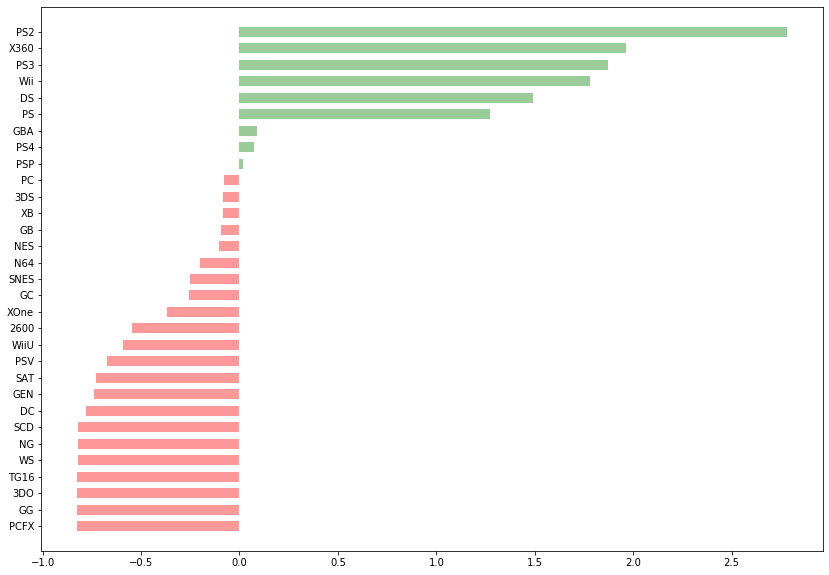

In [39]:
plt.figure(figsize = (14, 10))
#create a graph with horizontal lines
plt.hlines(y =sales_df.platform, xmin = 0, xmax = sales_df.sales_z, color = sales_df.colors, alpha = 0.4, linewidth = 10)

#### Remove values with less than 1 million of sales .
#### When rounding, these values will become 0.

In [40]:
df_tree = sales_df[sales_df['total_sales'] >= 1]

In [41]:
sizes = df_tree['total_sales'].values.tolist()

In [42]:
labels = df_tree.apply(lambda x: str(x[0]) + '\n' + '$' + str(round(x[1])), axis = 1)  

### Look at how sales varied from platform to platform

#### This is the distribution of sales.

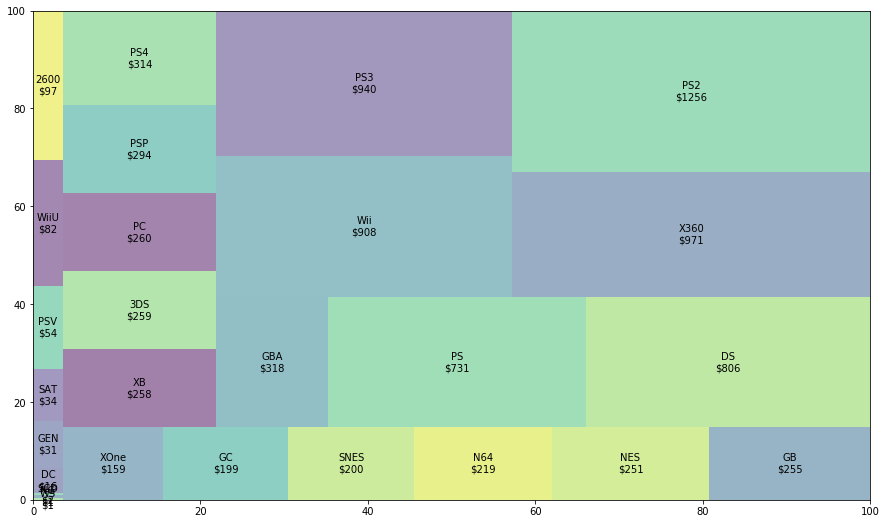

In [43]:
plt.figure(figsize = (15, 9))
squarify.plot(sizes = sizes, label = labels, alpha = 0.5)

### Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [44]:
#I will choose platforms that have total sales of over 700 million dollasr
big_salses_list =  sales_df[sales_df['total_sales'] > 700]['platform'].values.tolist()

In [45]:
big_salses_df = df_games[df_games['platform'].isin(big_salses_list)][['platform', 'year_of_release', 'total_sales']]
big_salses_df.head()

platform  year_of_release  total_sales
0      Wii             2006        82.54
2      Wii             2008        35.52
3      Wii             2009        32.77
6       DS             2006        29.80
7      Wii             2006        28.91

In [46]:
big_salses_df.shape

(9422, 3)

In [47]:
sales_by_year_df =  big_salses_df.pivot_table(index = ('platform', 'year_of_release'), values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release').reset_index()
sales_by_year_df.head()

platform  year_of_release  total_sales
0       DS             1985         3.35
1       PS             1994         9.31
2       PS             1995        35.96
3       PS             1996        94.70
4       PS             1997       136.17

In [48]:
sales_by_year_df.shape

(67, 3)

#### The instructions said to print for each year.
#### There is no need to print before 1994

Distribution for year: 1985


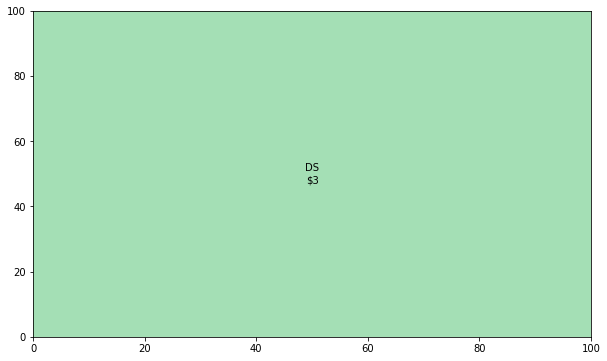

Distribution for year: 1986


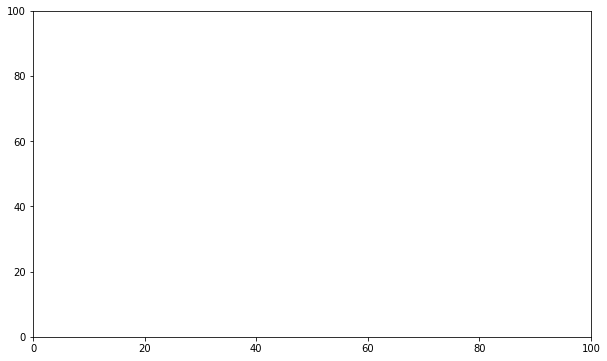

Distribution for year: 1987


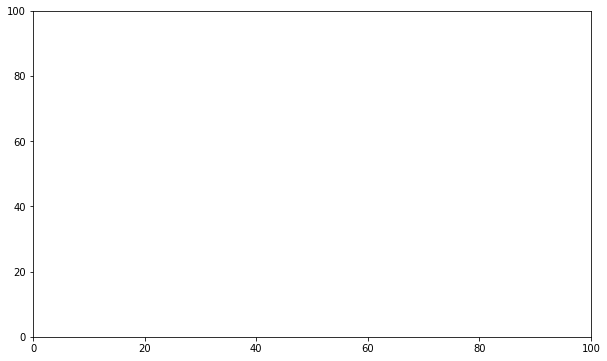

Distribution for year: 1988


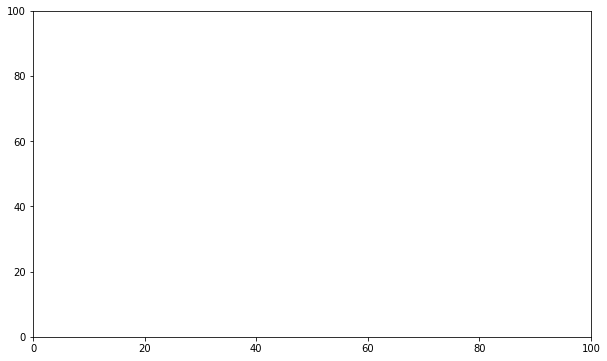

Distribution for year: 1989


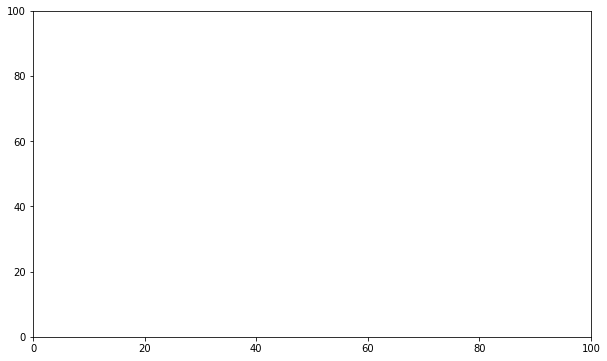

Distribution for year: 1990


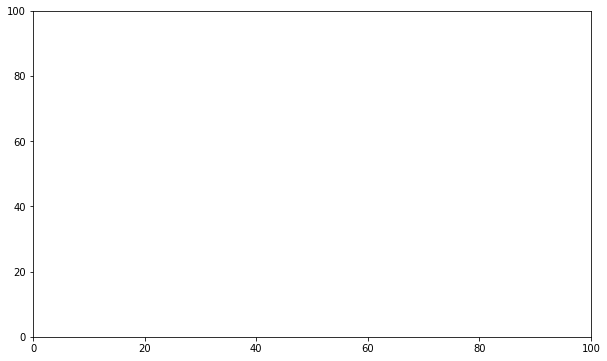

Distribution for year: 1991


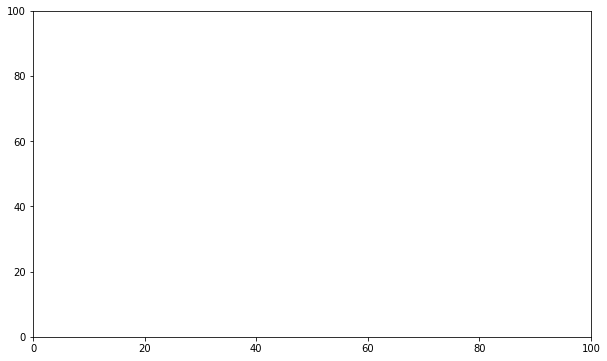

Distribution for year: 1992


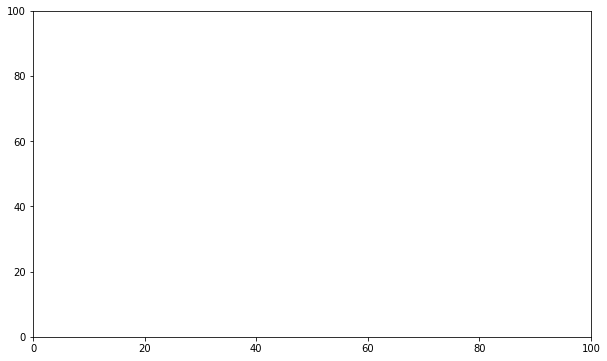

Distribution for year: 1993


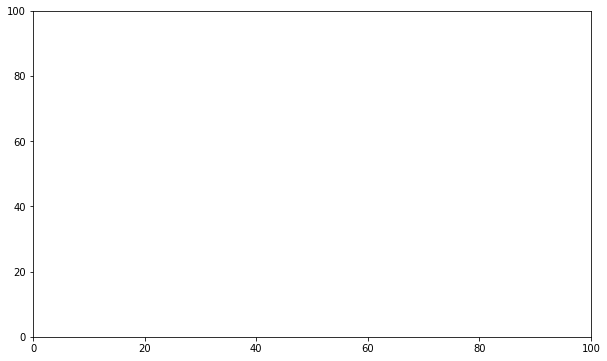

Distribution for year: 1994


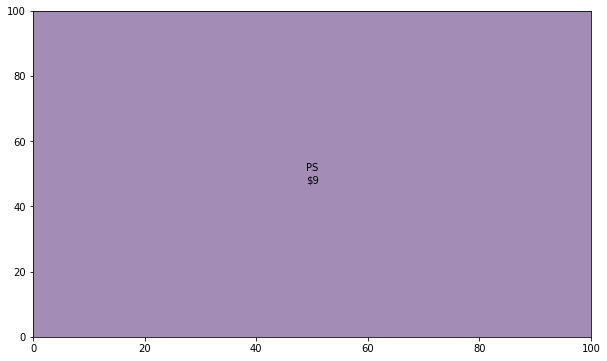

Distribution for year: 1995


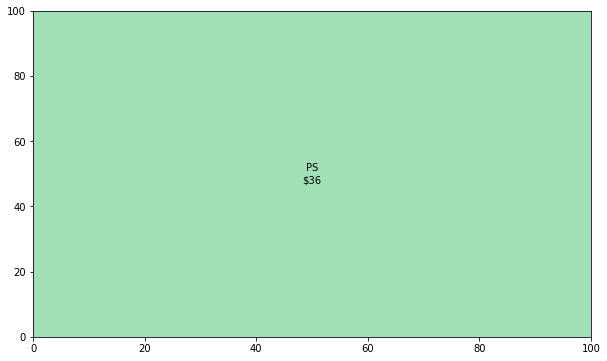

Distribution for year: 1996


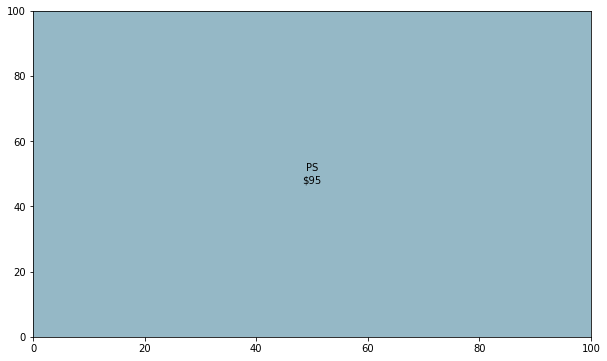

Distribution for year: 1997


Distribution for year: 1998


Distribution for year: 1999


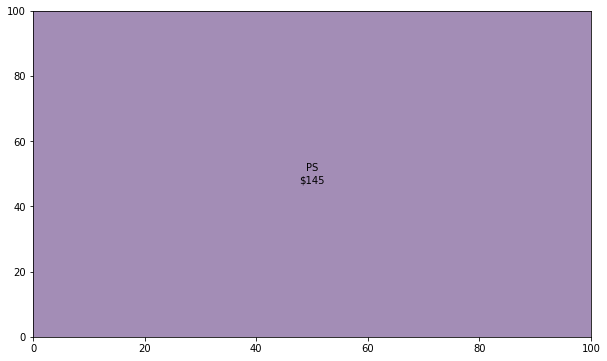

Distribution for year: 2000


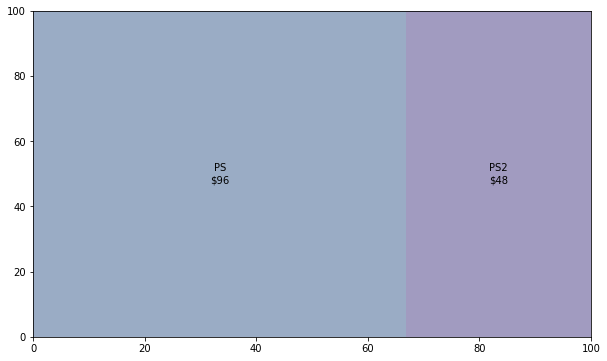

Distribution for year: 2001


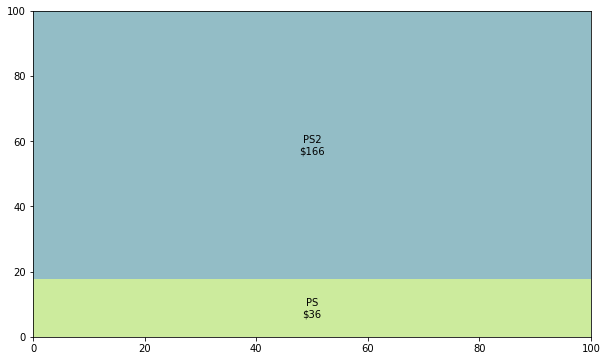

Distribution for year: 2002


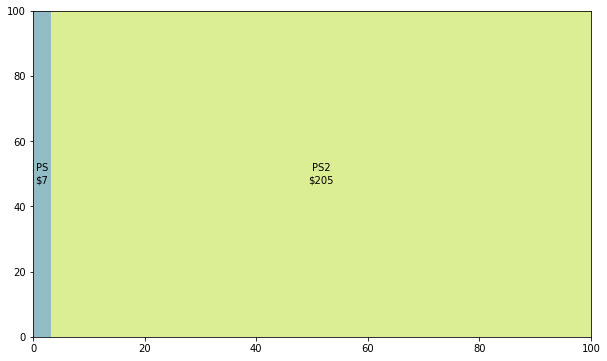

Distribution for year: 2003


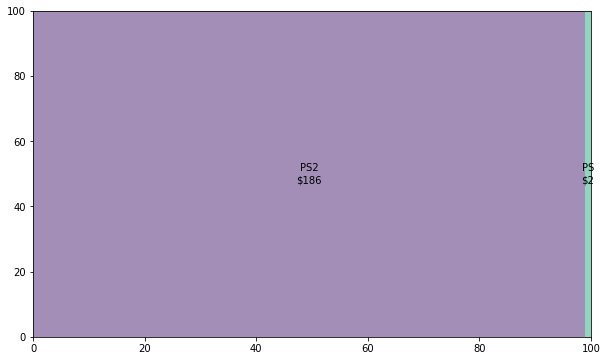

Distribution for year: 2004


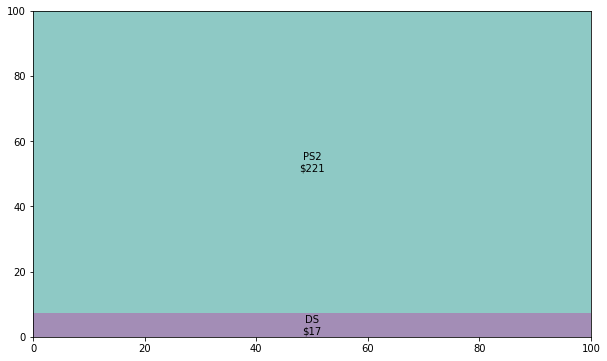

Distribution for year: 2005


Distribution for year: 2006


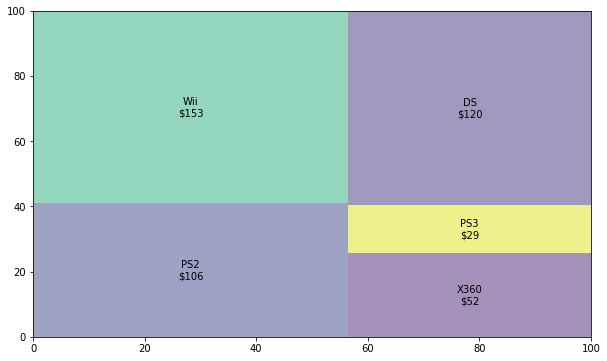

Distribution for year: 2007


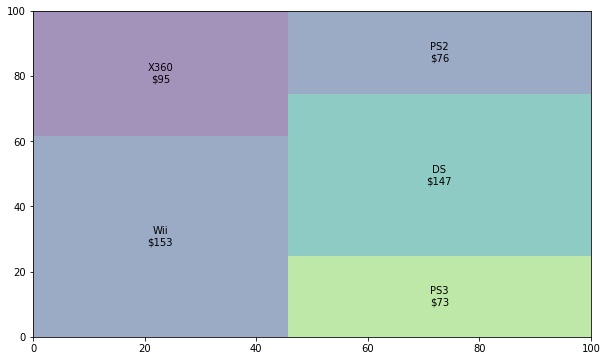

Distribution for year: 2008


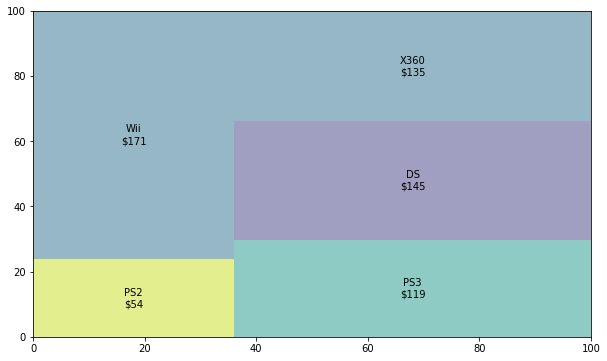

Distribution for year: 2009


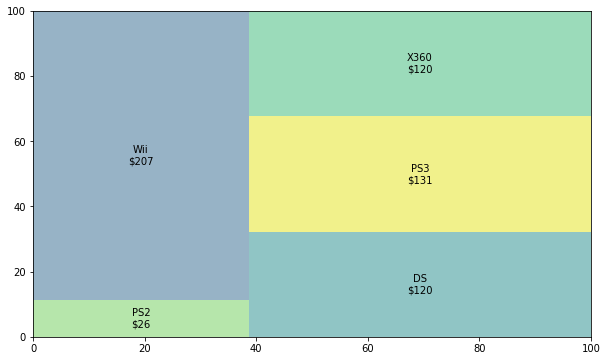

Distribution for year: 2010


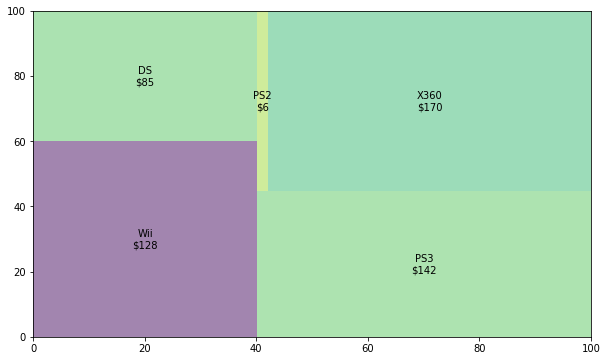

Distribution for year: 2011


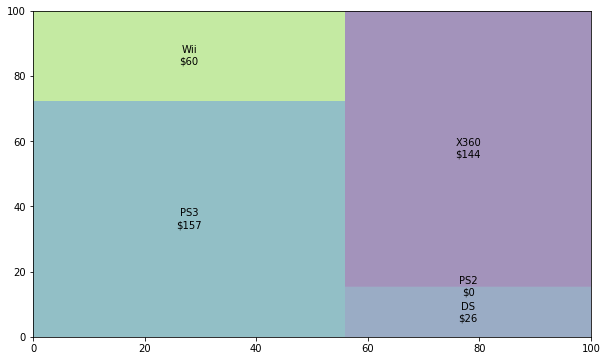

Distribution for year: 2012


Distribution for year: 2013


Distribution for year: 2014


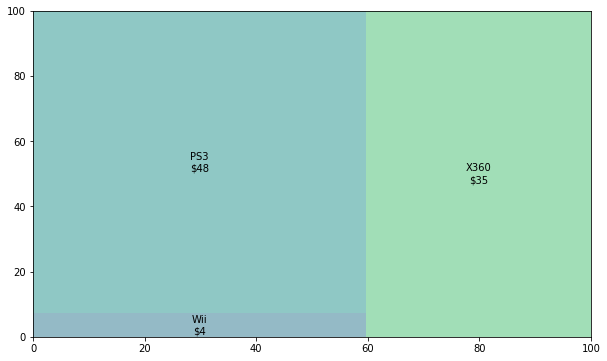

Distribution for year: 2015


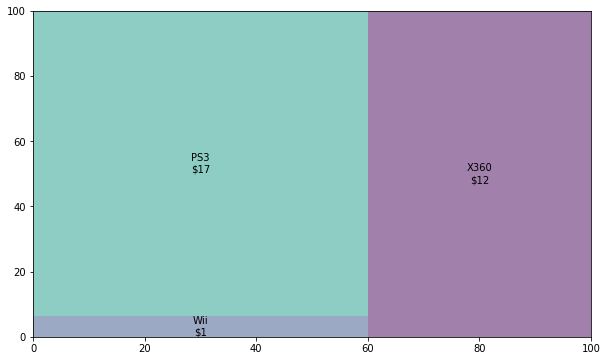

Distribution for year: 2016


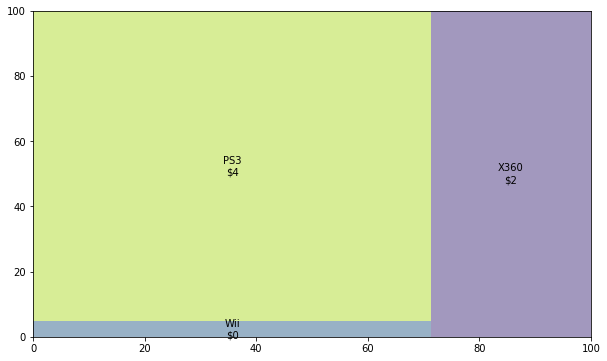

In [49]:


year_min = sales_by_year_df.year_of_release.min()
year_max = sales_by_year_df.year_of_release.max()

for year in range(year_min, year_max + 1):
    print('Distribution for year:', year)
    
    sizes = sales_by_year_df[sales_by_year_df['year_of_release'] == year]['total_sales'].values.tolist()    
    labels = sales_by_year_df[sales_by_year_df['year_of_release'] == year].apply(lambda x: str(x[0]) + '\n' + '$' + str(round(x[2])), axis = 1)
    
    plt.figure(figsize = (10, 6))
    squarify.plot(sizes = sizes, label = labels, alpha = 0.5)
    plt.show()


### Find platforms that used to be popular but now have zero sales. 
### How long does it generally take for new platforms to appear and old ones to fade?

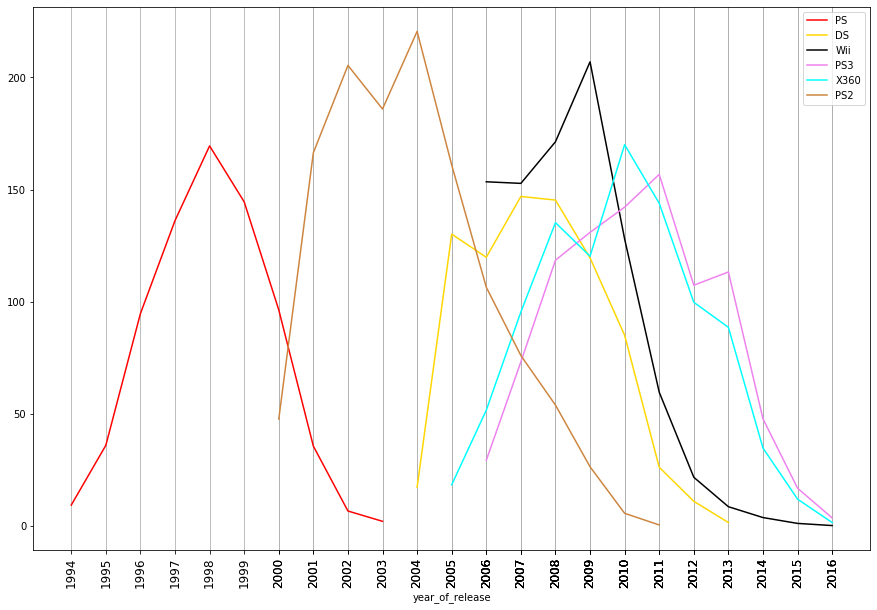

In [50]:
#will show from 1994

sales_by_year_df = sales_by_year_df[sales_by_year_df['year_of_release'] >= 1994]


fig, ax = plt.subplots(figsize = (15, 10))

colors = ['red', 'gold', 'black', 'violet', 'cyan', 'peru']
i = 0

for platform in big_salses_list:
    df = sales_by_year_df[(sales_by_year_df['platform'] == platform) ]
    df.plot(kind = 'line', x = 'year_of_release', y = 'total_sales', color = colors[i], ax = ax, label = platform)
    i += 1

ax.grid(axis = 'x')
#set ticks
ax.set_xticks(sales_by_year_df.year_of_release)
ax.set_xticklabels(sales_by_year_df.year_of_release, rotation = 90, fontdict = {'horizontalalignment' : 'center', 'size': 12})

plt.show()



#### Look at platform from the last 10 years.
#### Regardless if they are leading or not.


In [51]:
list_platform =  df_games[df_games['year_of_release'] > 2002]['platform'].unique()

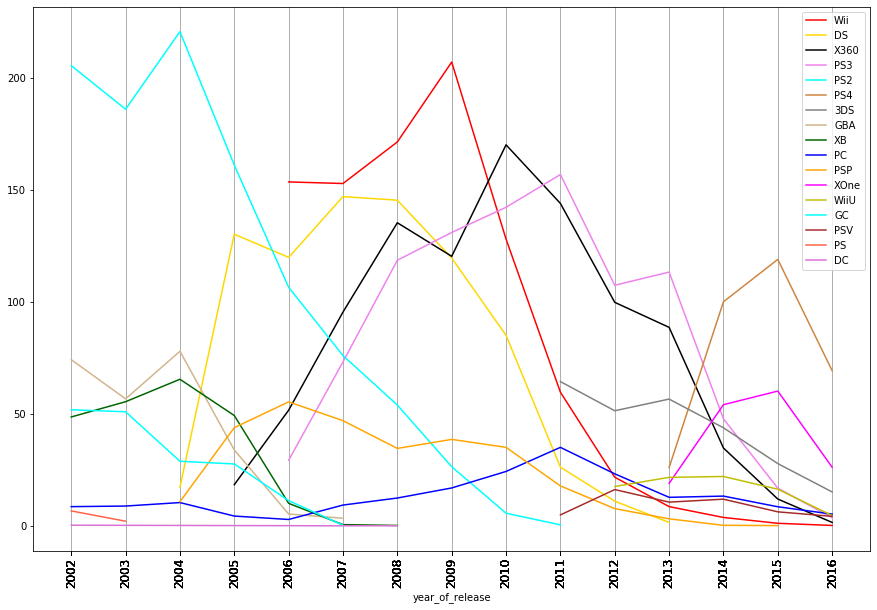

In [52]:
#platform from the last 10 years.
sales_by_year_df_10 =  df_games.pivot_table(index = ('platform', 'year_of_release'), values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release').reset_index()
sales_by_year_df_10 = sales_by_year_df_10[sales_by_year_df_10['year_of_release'] >= 2002]


fig, ax = plt.subplots(figsize = (15, 10))

colors = ['red', 'gold', 'black', 'violet', 'cyan', 'peru', 'gray', 'tan', 'darkgreen', 'blue', 'orange', 'fuchsia', 'y', 'aqua', 'brown', 'tomato', 'orchid']
i = 0

for platform in list_platform:
    df_10 = sales_by_year_df_10[(sales_by_year_df_10['platform'] == platform)]
    df_10.plot(kind = 'line', x = 'year_of_release', y = 'total_sales', color = colors[i], ax = ax, label = platform)
    i += 1

ax.grid(axis = 'x')
#set ticks
ax.set_xticks(sales_by_year_df_10.year_of_release)
ax.set_xticklabels(sales_by_year_df_10.year_of_release, rotation = 90, fontdict = {'horizontalalignment' : 'center', 'size': 12})

plt.show()


#### The relatively new platforms XOne, PS4 are also passed their pick and declining.

In [53]:
sales_by_year_df_10.head()

platform  year_of_release  total_sales
107       DC             2002         0.29
108       PC             2002         8.57
109       PS             2002         6.67
110      GBA             2002        74.16
111      N64             2002         0.08

#### It seems that a platform will almost vanish after 8 years, and completely vanish after 10

### Determine what period you should take data for. 
### To do so, look at your answers to the previous questions. 
### The data should allow you to build a prognosis for 2017.

#### The conclusion was that after 10 years a platform is old, 2003 brings us half way through PS2.
#### So I will start my data from 2000, because that is when PS2 begins.

### Which platforms are leading in sales? 
### Which ones are growing or shrinking?
### Select several potentially profitable platforms.

#### In order to look at the change, will calculate the difference in sales between years.

In [54]:
#find total sale by year for each platform
df_games_total_sales = df_games[df_games['year_of_release'] >= 2000 ].pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum', fill_value = 0)
df_games_total_sales.tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS  PS2  \
year_of_release                                                           
2012             51.36  0.0  11.01  0.0  0.0  0.0  0.0  23.22  0.0  0.0   
2013             56.57  0.0   1.54  0.0  0.0  0.0  0.0  12.73  0.0  0.0   
2014             43.76  0.0   0.00  0.0  0.0  0.0  0.0  13.28  0.0  0.0   
2015             27.78  0.0   0.00  0.0  0.0  0.0  0.0   8.52  0.0  0.0   
2016             15.14  0.0   0.00  0.0  0.0  0.0  0.0   5.25  0.0  0.0   

platform            PS3     PS4   PSP    PSV   WS    Wii   WiiU   X360   XB  \
year_of_release                                                               
2012             107.36    0.00  7.69  16.19  0.0  21.71  17.56  99.74  0.0   
2013             113.25   25.99  3.14  10.59  0.0   8.59  21.65  88.58  0.0   
2014              47.76  100.00  0.24  11.90  0.0   3.75  22.03  34.74  0.0   
2015              16.82  118.90  0.12   6.25  0.0   1.14  16.35  11.96  0.0   
2016               3.60   69.25  0.00   4.25  0.0   0.18   4.60   1.52  0.0   

platform          XOne  
year_of_release         
2012              0.00  
2013             18.96  
2014             54.07  
2015             60.14  
2016             26.15

In [55]:
df_games_total_sales.shift(+1).tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS   PS2  \
year_of_release                                                            
2012             64.39  0.0  26.18  0.0  0.0  0.0  0.0  35.03  0.0  0.45   
2013             51.36  0.0  11.01  0.0  0.0  0.0  0.0  23.22  0.0  0.00   
2014             56.57  0.0   1.54  0.0  0.0  0.0  0.0  12.73  0.0  0.00   
2015             43.76  0.0   0.00  0.0  0.0  0.0  0.0  13.28  0.0  0.00   
2016             27.78  0.0   0.00  0.0  0.0  0.0  0.0   8.52  0.0  0.00   

platform            PS3     PS4    PSP    PSV   WS    Wii   WiiU    X360   XB  \
year_of_release                                                                 
2012             156.78    0.00  17.82   4.89  0.0  59.65   0.00  143.89  0.0   
2013             107.36    0.00   7.69  16.19  0.0  21.71  17.56   99.74  0.0   
2014             113.25   25.99   3.14  10.59  0.0   8.59  21.65   88.58  0.0   
2015              47.76  100.00   0.24  11.90  0.0   3.75  22.03   34.74  0.0   
2016              16.82  118.90   0.12   6.25  0.0   1.14  16.35   11.96  0.0   

platform          XOne  
year_of_release         
2012              0.00  
2013              0.00  
2014             18.96  
2015             54.07  
2016             60.14

In [56]:
dynamics_df = df_games_total_sales - df_games_total_sales.shift(+1)

In [57]:
dynamics_df.tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS   PS2  \
year_of_release                                                            
2012            -13.03  0.0 -15.17  0.0  0.0  0.0  0.0 -11.81  0.0 -0.45   
2013              5.21  0.0  -9.47  0.0  0.0  0.0  0.0 -10.49  0.0  0.00   
2014            -12.81  0.0  -1.54  0.0  0.0  0.0  0.0   0.55  0.0  0.00   
2015            -15.98  0.0   0.00  0.0  0.0  0.0  0.0  -4.76  0.0  0.00   
2016            -12.64  0.0   0.00  0.0  0.0  0.0  0.0  -3.27  0.0  0.00   

platform           PS3    PS4    PSP    PSV   WS    Wii   WiiU   X360   XB  \
year_of_release                                                              
2012            -49.42   0.00 -10.13  11.30  0.0 -37.94  17.56 -44.15  0.0   
2013              5.89  25.99  -4.55  -5.60  0.0 -13.12   4.09 -11.16  0.0   
2014            -65.49  74.01  -2.90   1.31  0.0  -4.84   0.38 -53.84  0.0   
2015            -30.94  18.90  -0.12  -5.65  0.0  -2.61  -5.68 -22.78  0.0   
2016            -13.22 -49.65  -0.12  -2.00  0.0  -0.96 -11.75 -10.44  0.0   

platform          XOne  
year_of_release         
2012              0.00  
2013             18.96  
2014             35.11  
2015              6.07  
2016            -33.99

#### Visualize the change in sales for each platform

#### In order to view change over time, will transpose.
#### Swap between X & Y

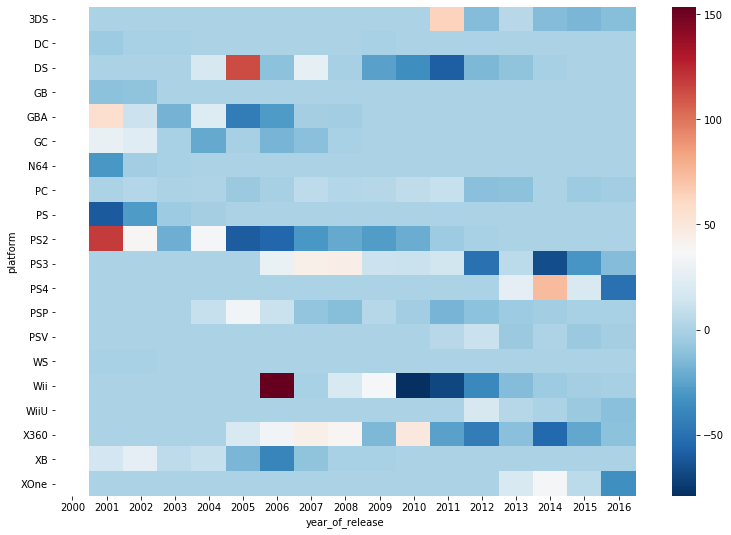

In [58]:
plt.figure(figsize = (13, 9))
sns.heatmap(dynamics_df.T, cmap = 'RdBu_r')  #use RED & BLUE colors

#### If the value is 0. 
#### It mean that the platform did not exist at that time, 
#### Or there was no change in sales from previous year.

#### The leading platforms is sales are: PS4, XOne, 3DS, PC.
#### All of the platforms are all shrinking in sales.
#### The potential profitable platforms would be: the biggest sales from last year. They are shrinking but they are selling: PS4, XOne, 3DS, PC.

### Build a box plot for the global sales of all games, broken down by platform.
### Are the differences in sales significant? What about average sales on various platforms?
### Describe your findings.

In [59]:
grouped_df = df_games[df_games['year_of_release'] > 2000].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [60]:
grouped_df.head()

platform  year_of_release  total_sales
0      3DS             2011        64.39
1      3DS             2012        51.36
2      3DS             2013        56.57
3      3DS             2014        43.76
4      3DS             2015        27.78

#### a list of the platforms ordered from least profitable to most profitable.

In [61]:
ordered_df = grouped_df.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

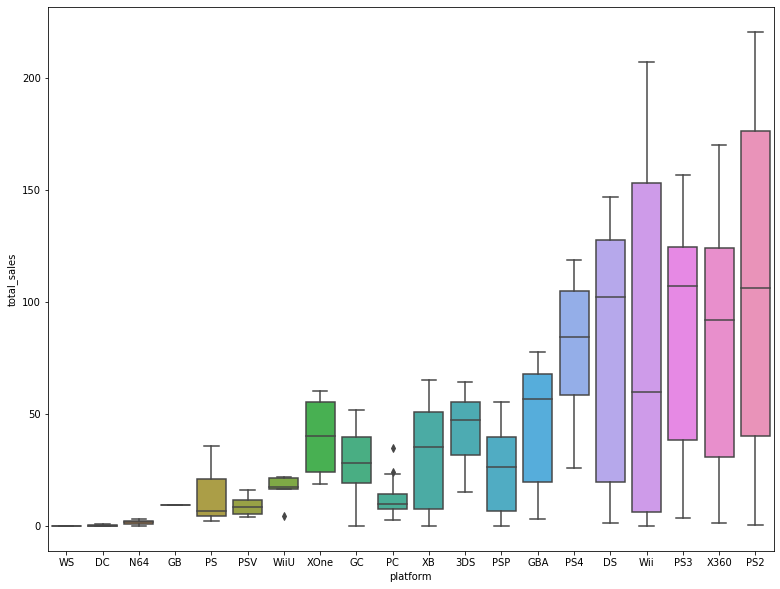

In [62]:
plt.figure(figsize = (13, 10))
sns.boxplot(x = 'platform', y = 'total_sales', data = grouped_df, order = ordered_df)

#### over the years the leading platforms were showing better mean then the rest of the platforms.

### Are the differences in sales significant? 

#### The differences are very significant.
#### At the top of popularity sales have reached 200 million a year in sales for a single platform. And many have sold in more them 100 million.
#### But in the last year, the leading platforms: PS4, XOne, 3DS, PC . have bearlu touched the 50 million mark, or less.


### What about average sales on various platforms? Describe your findings.

#### All of the platforms are declining in sales. 
#### Historically, the most popular platforms had a mean that ranged between 70 to 100 million. Except WII, which was huge in sales, but its mean was about 50 million.
#### Then there are the next stage in popularity, with a mean of between 20 to 40 million.


### Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
### Build a scatter plot and calculate the correlation between reviews and sales. 
### Draw conclusions.

In [63]:
ps2_df = df_games[df_games['platform'] == 'PS2'][['name', 'year_of_release', 'genre', 'total_sales', 'critic_score', 'user_score']]
ps2_df.head()

name  year_of_release   genre  total_sales  \
17  Grand Theft Auto: San Andreas             2004  Action        20.81   
24    Grand Theft Auto: Vice City             2002  Action        16.15   
28         Gran Turismo 3: A-Spec             2001  Racing        14.97   
38           Grand Theft Auto III             2001  Action        13.10   
48                 Gran Turismo 4             2004  Racing        11.65   

    critic_score  user_score  
17          95.0         9.0  
24          95.0         8.7  
28          95.0         8.4  
38          97.0         8.5  
48          89.0         8.5

In [64]:
#total sales by year
ps2_df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

total_sales
year_of_release             
2000                   47.66
2001                  166.43
2002                  205.38
2003                  185.93
2004                  220.55
2005                  160.98
2006                  106.46
2007                   75.99
2008                   53.90
2009                   26.40
2010                    5.64
2011                    0.45

In [65]:
#mean critic_score by year
ps2_df.pivot_table(index = 'year_of_release', values = 'critic_score', aggfunc = 'mean')

critic_score
year_of_release              
2000                69.351682
2001                70.431456
2002                68.772820
2003                70.451354
2004                69.030870
2005                68.999004
2006                66.486347
2007                65.924661
2008                63.996233
2009                66.923297
2010                66.138735
2011                69.109712

In [66]:
ps2_values_df = ps2_df.pivot_table(index = 'year_of_release', values = ('total_sales', 'critic_score', 'user_score'), aggfunc = ('sum', 'mean')).reset_index()

In [67]:
del ps2_values_df[('critic_score', 'sum')]
del ps2_values_df[('total_sales', 'mean')]
del ps2_values_df[('user_score', 'sum')]

In [68]:
ps2_values_df.columns = ['year_of_release', 'critic_score_mean', 'total_sales_sum', 'user_score_mean']

#### summary of values for PS2 platform

In [69]:
ps2_values_df

year_of_release  critic_score_mean  total_sales_sum  user_score_mean
0              2000          69.351682            47.66         7.563500
1              2001          70.431456           166.43         7.448616
2              2002          68.772820           205.38         7.576012
3              2003          70.451354           185.93         7.932953
4              2004          69.030870           220.55         7.805433
5              2005          68.999004           160.98         7.684950
6              2006          66.486347           106.46         7.412028
7              2007          65.924661            75.99         7.007532
8              2008          63.996233            53.90         6.858633
9              2009          66.923297            26.40         6.761097
10             2010          66.138735             5.64         6.984943
11             2011          69.109712             0.45         6.381996

#### Total sales by critic score for PS2

Text(0, 0.5, 'critic score mean')

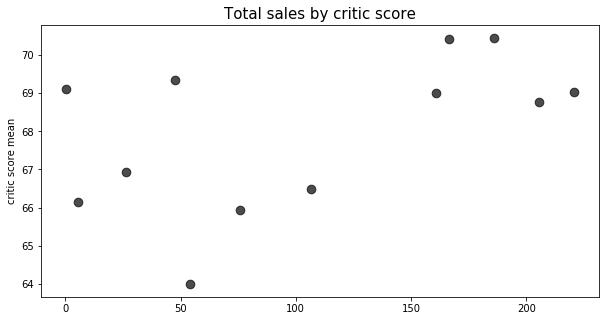

In [70]:
fig, ax = plt.subplots(figsize = (10, 5))
#ax.vlines(x = amount_year_of_release_df.year_of_release, ymin = 0, ymax = amount_year_of_release_df.name, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = ps2_values_df.total_sales_sum, y = ps2_values_df.critic_score_mean, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Total sales by critic score', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('critic score mean')


#### Total sales by user score for PS2

Text(0, 0.5, 'user score mean')

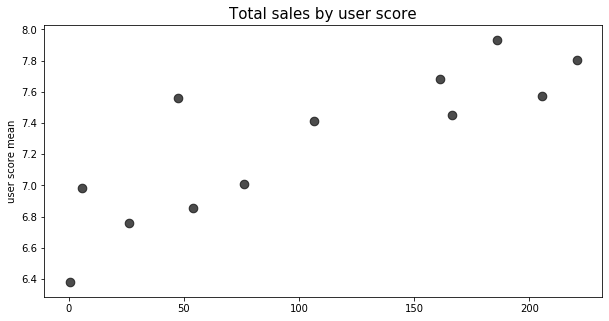

In [71]:
fig, ax = plt.subplots(figsize = (10, 5))
#ax.vlines(x = amount_year_of_release_df.year_of_release, ymin = 0, ymax = amount_year_of_release_df.name, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = ps2_values_df.total_sales_sum, y = ps2_values_df.user_score_mean, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Total sales by user score', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('user score mean')


#### Correlation between Total sales & critic score

In [72]:
print(ps2_values_df.total_sales_sum.corr(ps2_values_df.critic_score_mean) )

0.5274278085236433


#### Correlation between Total sales & user score

In [73]:
print(ps2_values_df.total_sales_sum.corr(ps2_values_df.user_score_mean) )

0.8427390602159739


#### The Correlation between the users score and the sales is much stronger than between sales and critic scores

#### My conclusion is that the users scores is a good indication of future sales

### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

#### Will look at games from PS2 that appear at other platforms

In [74]:
ps2_name_list =  ps2_df.loc[:, 'name'].unique()

#### find games that are on PS2 and on other platforms:

#### games on PS2

In [75]:
df_games[(df_games['name'].isin(ps2_name_list)) & (df_games['platform'] != 'PS2')].sort_values(by = 'name').head()

name platform  year_of_release   genre  na_sales  \
3120   007: Quantum of Solace      Wii             2008  Action      0.29   
1285   007: Quantum of Solace     X360             2008  Action      0.82   
9507   007: Quantum of Solace       DS             2008  Action      0.11   
1785   007: Quantum of Solace      PS3             2008  Action      0.43   
14658  007: Quantum of Solace       PC             2008  Action      0.01   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
3120       0.28      0.01         0.07          54.0    7.500000      T   
1285       0.51      0.01         0.14          65.0    7.100000      T   
9507       0.01      0.00         0.01          65.0    7.095139      T   
1785       0.51      0.02         0.19          65.0    6.600000      T   
14658      0.01      0.00         0.00          70.0    6.300000      T   

       total_sales  
3120          0.65  
1285          1.48  
9507          0.13  
1785          1.15  
14658         0.02

#### find platforms that run  PS2 games

In [76]:
#which plaftomrs:
platforms_list =  df_games[(df_games['name'].isin(ps2_name_list)) & (df_games['platform'] != 'PS2')].sort_values(by = 'name')['platform'].unique()

#### find sale data of SP2 games on other platforms

In [77]:
df_games_other_platforms =  df_games[(df_games['name'].isin(ps2_name_list)) & (df_games['platform'] != 'PS2')].pivot_table(index = ('platform', 'year_of_release'), values = ('critic_score', 'user_score', 'total_sales'), aggfunc = ('mean', 'sum')).reset_index()

In [78]:
del df_games_other_platforms[('critic_score', 'sum')]
del df_games_other_platforms[('total_sales', 'mean')]
del df_games_other_platforms[('user_score', 'sum')]

In [79]:
df_games_other_platforms.columns = ['platform', 'year_of_release', 'critic_score_mean', 'total_sales_sum', 'user_score_mean']

In [80]:
df_games_other_platforms.head()

platform  year_of_release  critic_score_mean  total_sales_sum  \
0     2600             1980           0.000000             1.05   
1      3DS             2011          69.816979             1.81   
2      3DS             2012          71.357143             0.16   
3      3DS             2015          77.087931             0.87   
4       DC             2000          71.764881             2.29   

   user_score_mean  
0         0.000000  
1         6.947519  
2         6.813333  
3         7.810303  
4         7.751410

In [81]:
print('Correlation between Total sales and Critic score:')
for platform in platforms_list:
    print()
    print('************')    
    print('for platform:', platform)
    df = df_games_other_platforms[df_games_other_platforms['platform'] == platform]
    print(df.total_sales_sum.corr(df.critic_score_mean))
    

print('Correlation between Total sales and Used score:')    
for platform in platforms_list:
    print()
    print('************')  
    print('for platform:', platform)
    df = df_games_other_platforms[df_games_other_platforms['platform'] == platform]
    print(df.total_sales_sum.corr(df.user_score_mean))      

Correlation between Total sales and Critic score:

************
for platform: Wii
-0.8772674189889915

************
for platform: X360
-0.8816907542351787

************
for platform: DS
-0.41718498688632333

************
for platform: PS3
-0.6691079830604914

************
for platform: PC
-0.21126892271195608

************
for platform: GC
0.270844149995199

************
for platform: XB
0.07126414872660422

************
for platform: PSP
-0.16049958195232597

************
for platform: GBA
0.6402259869944981

************
for platform: PSV
0.9999999999999999

************
for platform: PS
0.7128603394336854

************
for platform: N64
0.3998574865696205

************
for platform: 3DS
-0.2789239038922263

************
for platform: DC
nan

************
for platform: 2600
nan

************
for platform: SNES
nan

************
for platform: GB
nan

************
for platform: WiiU
-1.0

************
for platform: PS4
nan

************
for platform: GEN
nan

************
for platform:

C:\Users\Angel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\Angel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning:

divide by zero encountered in true_divide



#### For most platforms the correlation between sales and user score and the critic score, is negative or small. 
#### There are a few that there is a correlation.
#### My conclusion is that the popularity of PS2 is not game related.
#### The users like the platform itself

### Take a look at the general distribution of games by genre. 
### What can we say about the most profitable genres?
### Can you generalize about genres with high and low sales?

In [82]:
df_games[df_games['year_of_release'] >= 2000].pivot_table(index = ('genre'), values = 'total_sales', aggfunc = 'sum' ).sort_values(by = 'total_sales')

total_sales
genre                    
Strategy           116.03
Puzzle             139.47
Adventure          186.36
Fighting           316.16
Simulation         337.02
Platform           495.58
Racing             565.07
Misc               730.36
Role-Playing       733.67
Shooter            918.40
Sports            1150.09
Action            1547.64

#### The most profitable genre is: action. Then sports and shooter.
#### The less profitable genre is: Strategy.
#### I would expect that for next year, the high ranking sales in games will be in these categories: action, sports , shooter.


<div class="alert alert-success">
    Well done!
</div>

### Step 4. Create a user profile for each region

### For each region (NA, EU, JP), determine:
### The top five platforms. Describe variations in their market shares from region to region.
### The top five genres. Explain the difference.
### Do ESRB ratings affect sales in individual regions?

#### for North America market:

In [83]:
#find total sales by playform
sales_na_df = df_games[['platform', 'na_sales']].groupby('platform').sum().sort_values('na_sales').reset_index()
#sales_na_df

#### find the Z value.

In [84]:
sales_na_df['sales_z'] = (sales_na_df['na_sales'] - sales_na_df['na_sales'].mean()) / sales_na_df['na_sales'].std()

In [85]:
sales_na_df['colors'] = ['red' if x < 0 else 'green' for x in sales_na_df['sales_z']]

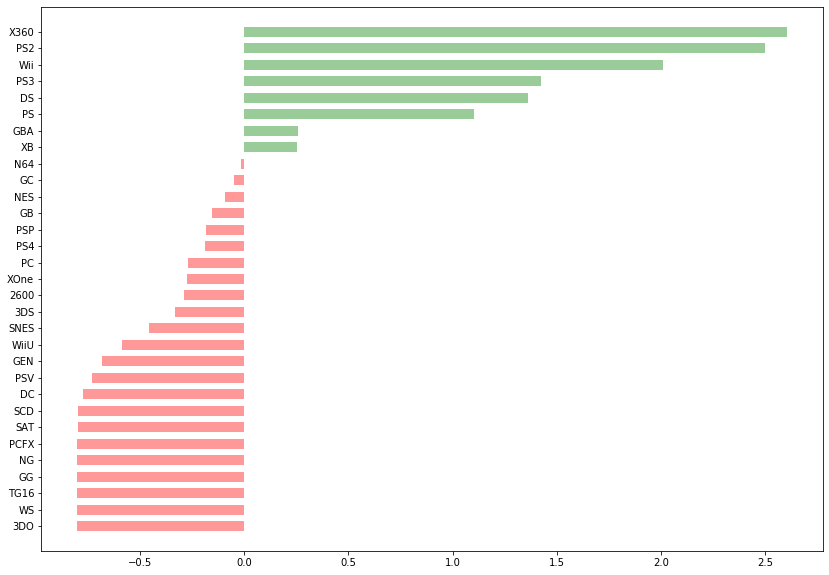

In [86]:
plt.figure(figsize = (14, 10))
#create a graph with horizontal lines
plt.hlines(y =sales_na_df.platform, xmin = 0, xmax = sales_na_df.sales_z, color = sales_na_df.colors, alpha = 0.4, linewidth = 10)

In [87]:
sales_na_five_df =  sales_na_df.tail().reset_index()

In [88]:
total_na = sales_na_five_df['na_sales'].sum()

#### sales in North America with share in market

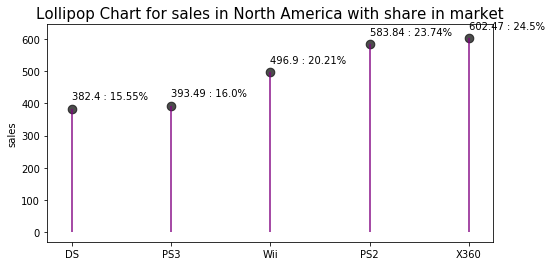

In [89]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.vlines(x = sales_na_five_df.platform, ymin = 0, ymax = sales_na_five_df.na_sales, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = sales_na_five_df.platform, y = sales_na_five_df.na_sales, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Lollipop Chart for sales in North America with share in market', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('sales')

#add text above the dot
for row in sales_na_five_df.itertuples():
    ax.text(row.platform, row.na_sales + 30, s = str(round(row.na_sales, 2)) + ' : '+ str( round((row.na_sales / total_na) * 100, 2)) + '%')
    

#### The top five platforms for North America are: X360, PS2, WII, PS3, DS.

#### for Europe market:

In [90]:
#find total sales by playform
sales_eu_df = df_games[['platform', 'eu_sales']].groupby('platform').sum().sort_values('eu_sales').reset_index()

#### find the Z value.

In [91]:
sales_eu_df['sales_z'] = (sales_eu_df['eu_sales'] - sales_eu_df['eu_sales'].mean()) / sales_eu_df['eu_sales'].std()

In [92]:
sales_eu_df['colors'] = ['red' if x < 0 else 'green' for x in sales_eu_df['sales_z']]

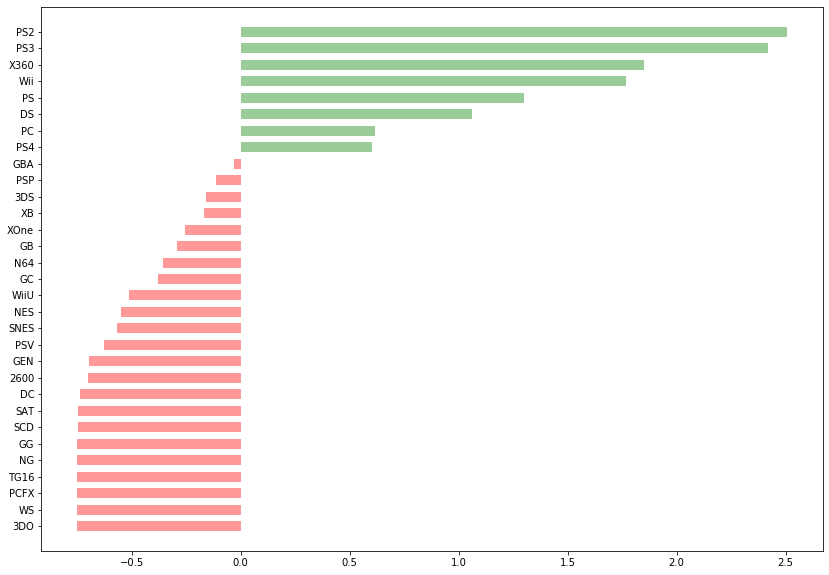

In [93]:
plt.figure(figsize = (14, 10))
#create a graph with horizontal lines
plt.hlines(y =sales_eu_df.platform, xmin = 0, xmax = sales_eu_df.sales_z, color = sales_eu_df.colors, alpha = 0.4, linewidth = 10)


#### The top five platforms for Europe  are: PS2, PS3, X360, WII, PS.

In [94]:
sales_eu_five_df =  sales_eu_df.tail().reset_index()

In [95]:
total_eu = sales_eu_five_df['eu_sales'].sum()

####  sales in Europe with share in market

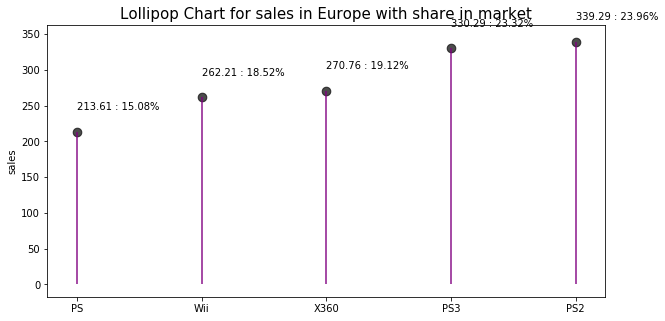

In [96]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.vlines(x = sales_eu_five_df.platform, ymin = 0, ymax = sales_eu_five_df.eu_sales, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = sales_eu_five_df.platform, y = sales_eu_five_df.eu_sales, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Lollipop Chart for sales in Europe with share in market', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('sales')

#add text above the dot
for row in sales_eu_five_df.itertuples():
    ax.text(row.platform, row.eu_sales + 30, s = str(round(row.eu_sales, 2)) + ' : '+ str( round((row.eu_sales / total_eu) * 100, 2)) + '%')
    

#### for Japan market:

In [97]:
#find total sales by playform
sales_jp_df = df_games[['platform', 'jp_sales']].groupby('platform').sum().sort_values('jp_sales').reset_index()

#### find the Z value.

In [98]:
sales_jp_df['sales_z'] = (sales_jp_df['jp_sales'] - sales_jp_df['jp_sales'].mean()) / sales_jp_df['jp_sales'].std()

In [99]:
sales_jp_df['colors'] = ['red' if x < 0 else 'green' for x in sales_jp_df['sales_z']]

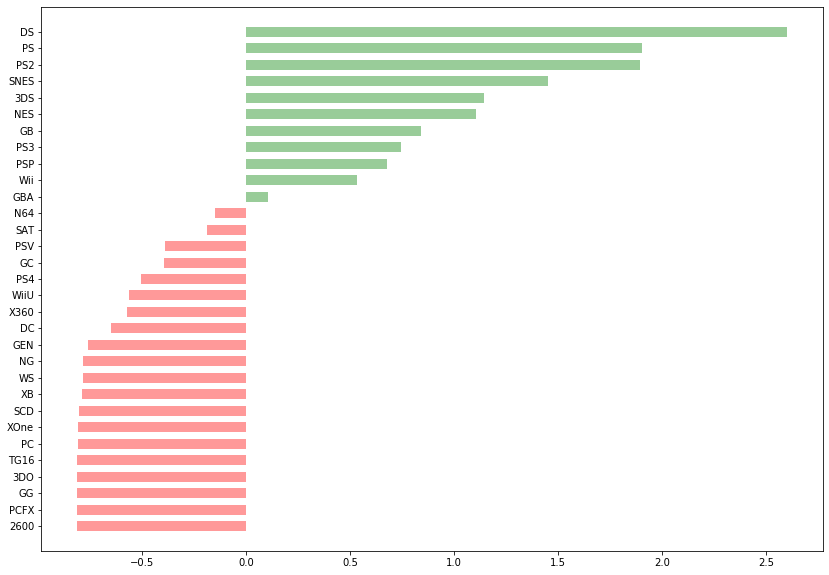

In [100]:
plt.figure(figsize = (14, 10))
#create a graph with horizontal lines
plt.hlines(y =sales_jp_df.platform, xmin = 0, xmax = sales_jp_df.sales_z, color = sales_jp_df.colors, alpha = 0.4, linewidth = 10)


#### The top five platforms for Japan are: DS, PS, PS2, SNES, 3DS.

In [101]:
sales_jp_five_df =  sales_jp_df.tail().reset_index()

In [102]:
total_jp = sales_jp_five_df['jp_sales'].sum()

#### sales in Japan with share in market

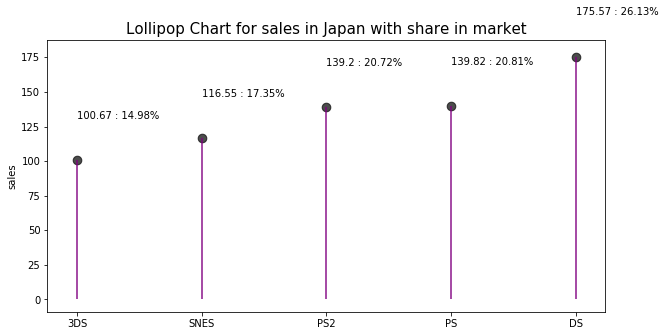

In [103]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.vlines(x = sales_jp_five_df.platform, ymin = 0, ymax = sales_jp_five_df.jp_sales, color = 'purple', alpha = 0.7, linewidth = 2)
ax.scatter(x = sales_jp_five_df.platform, y = sales_jp_five_df.jp_sales, s = 75, color = 'black', alpha = 0.7)

#set title
ax.set_title('Lollipop Chart for sales in Japan with share in market', fontdict = {'size': 15})
#set lable for Y
ax.set_ylabel('sales')

#add text above the dot
for row in sales_jp_five_df.itertuples():
    ax.text(row.platform, row.jp_sales + 30, s = str(round(row.jp_sales, 2)) + ' : '+ str( round((row.jp_sales / total_jp) * 100, 2)) + '%')


### The top five genres. Explain the difference.

#### for North America

In [104]:
genre_na_df = df_games[['genre', 'na_sales']].groupby('genre').sum().sort_values('na_sales').reset_index()
genre_na_df.tail()

genre  na_sales
8       Misc    407.27
9   Platform    445.50
10   Shooter    592.24
11    Sports    684.43
12    Action    879.01

#### for Europe

In [105]:
genre_eu_df = df_games[['genre', 'eu_sales']].groupby('genre').sum().sort_values('eu_sales').reset_index()
genre_eu_df.tail()

genre  eu_sales
8      Misc    212.74
9    Racing    236.51
10  Shooter    317.34
11   Sports    376.79
12   Action    519.13

#### for Japan

In [106]:
genre_jp_df = df_games[['genre', 'jp_sales']].groupby('genre').sum().sort_values('jp_sales').reset_index()
genre_jp_df.tail()

genre  jp_sales
8           Misc    108.11
9       Platform    130.83
10        Sports    135.54
11        Action    161.43
12  Role-Playing    355.41

#### The leading genres for North America and Europe are the same.
#### Japan is a small market and it behaves differently than other markets.
#### Japan is also different then other markets regarding its preference of game platforms.

### Do ESRB ratings affect sales in individual regions?

In [107]:
#for North America
rating_na_df = df_games[['rating', 'na_sales']].groupby('rating').sum().sort_values('rating').reset_index()
rating_na_df.drop(rating_na_df[rating_na_df.rating == 'mis'].index, inplace=True)

In [108]:
#for Europe
rating_eu_df = df_games[['rating', 'eu_sales']].groupby('rating').sum().sort_values('rating').reset_index()
rating_eu_df.drop(rating_eu_df[rating_eu_df.rating == 'mis'].index, inplace=True)

In [109]:
#for Japan
rating_jp_df = df_games[['rating', 'jp_sales']].groupby('rating').sum().sort_values('rating').reset_index()
rating_jp_df.drop(rating_jp_df[rating_jp_df.rating == 'mis'].index, inplace=True)

In [110]:
branches = rating_jp_df['rating'].values.tolist()
na_genre_list = rating_na_df['na_sales'].values.tolist()
eu_genre_list = rating_eu_df['eu_sales'].values.tolist()
jp_genre_list = rating_jp_df['jp_sales'].values.tolist()

trace_na = go.Bar(
   x = branches,
   y = na_genre_list,
   name = 'NA'
)
trace_eu = go.Bar(
   x = branches,
   y = eu_genre_list,
   name = 'EU'
)
trace_jp = go.Bar(
   x = branches,
   y = jp_genre_list,
   name = 'JP'
)
data = [trace_na, trace_eu, trace_jp]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#### The most popular rating is E (everyone) for all markets

### Step 5. Test the following hypotheses:

### Average user ratings of the Xbox One and PC platforms are the same.

#### The null hypotheses H0:
#### The average user ratings of the Xbox One and PC platforms are the same

#### The alternative hypotheses H1:
#### The average user ratings of the Xbox One and PC platforms are different.

In [111]:
xone_user_rating = df_games[df_games['platform'] == 'XOne']['user_score']
pc_user_rating = df_games[df_games['platform'] == 'PC']['user_score']

#the significance level is 5%
alpha = 0.05

results = st.ttest_ind(xone_user_rating, pc_user_rating)
print('P-value:', results.pvalue)
if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')



P-value: 0.0006575842122565057
We reject the null hypothesis


#### conclusion: H1
#### The average user ratings of the Xbox One and PC platforms are different.

### Average user ratings for the Action and Sports genres are different.

#### The null hypotheses H0:
#### The average user ratings of the action and sport genres are the same

#### The alternative hypotheses H1:
#### The average user ratings of the action and sport genres are different.

In [112]:
Action_user_rating = df_games[df_games['genre'] == 'Action']['user_score']
sport_user_rating = df_games[df_games['genre'] == 'Sports']['user_score']

#the significance level is 5%
alpha = 0.05

results = st.ttest_ind(Action_user_rating, sport_user_rating)
print('P-value:', results.pvalue)
if(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')


P-value: 2.568847772468257e-13
We reject the null hypothesis


#### Conclosion: H1 
#### The average user ratings of the action and sport genres are different.

### How you formulated the null and alternative hypotheses

#### Null hypothesis H0 are always to be formulated in an equal sign.
#### And the H1 hypothesis is the opposite.


### What significance level you chose to test the hypotheses, and why

#### For the significance level I have chosen 5% as is the standard.

### Step 6. Write a general conclusion

#### Conclusion:
#### My recommendations for a 2017 campaign will be:
#### To emphasize on game for the current leading platforms in sales:  PS4, XOne, 3DS.
#### From the leading genres, which are: Action, Sports, Shooter.
#### The most preferred Rating is: E – everyone.
#### I would also suggest to monitor the users rating of the games.
